C:\Users\giada\Anaconda3\lib\site-packages\ipykernel\__main__.py:81: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


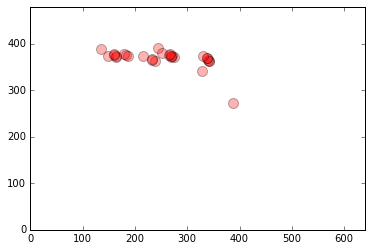

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

import cv2
import numpy as np

#Parameters setting:
sc_fct = 1.1              #scaling factor
min_neigh = 5             #minimum number of neighbours to identify an area as the specific object
min_size_f = (30,30)      #smallest face dimensions accepted
min_size_e = (10,10)      #smallest eye dimension accepted  
mindist_c=30              #minimum distance between circles' centers
dp_c=1                    #accumulator resolution factor
param1_c=60               #specific parameter of the Hough Gradient detection method 
param2_c=20               #specific parameter of the Hough Gradient detection method
minr_c=5                  #minimum circle radius accepted
maxr_c=15                 #maximum circle radius accepted




#Loading the cascade classifier files
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eyeCascade=cv2.CascadeClassifier("haarcascade_eye.xml")

#Capturing the video from the webcam and opening a window to display it
video_capture = cv2.VideoCapture(0)
cv2.namedWindow("Face and eyes")

#Saving the window dimensions
x_dim=int(video_capture.get(3))
y_dim=int(video_capture.get(4))

while True:
    #Capturing frames from the video
    ret, frame = video_capture.read()
    
    #Converting the image from colour to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    #Using the cascade classifier to identify faces in the video
    faces = faceCascade.detectMultiScale(       
        gray,
        scaleFactor=sc_fct,
        minNeighbors=min_neigh,
        minSize=min_size_f
        )
    #'detectMultiscale' function returns a list of rectangles described by the upper left vertex and the two dimensions
    
    #Drawing rectangles recognised by the detectMultiscale function
    for (x, y, w, h) in faces:
            cv2.rectangle(frame,(x, y), (x+w, y+h), (0, 255, 0), 2)
            
            #Defining new regions of interest
            roi_gray=gray[y:y+int(h/2),x:x+w]
            roi_color=frame[y:y+int(h/2),x:x+w]
        
        #Using the cascade classifier to identify eyes within the new ROI just defined
            eyes= eyeCascade.detectMultiScale(         
                 roi_gray,
                 scaleFactor=sc_fct,
                 minNeighbors=min_neigh,
                 minSize=min_size_e
                 )


            #Drawing rectangles returned by the detectMultiscale function
            for (ex, ey, ew, eh) in eyes:
                cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 191, 0), 2)
            
                #Defining new regions of interest 
                roi_gray2=roi_gray[ey:ey+eh,ex:ex+ew]
                roi_color2=roi_color[ey:ey+eh,ex:ex+ew]
                
                #Applying HoughCircles function to identify iris and pupil in the filtered image (HOUGH_GRADIENT is the method used)
                circles = cv2.HoughCircles(roi_gray2,cv2.HOUGH_GRADIENT,dp=dp_c,minDist=mindist_c,
                            param1=param1_c,param2=param2_c,minRadius=minr_c,maxRadius=maxr_c)
                #The function returns a list of circles described by the centre coordinates and the radius
                    
                #Checking validity of the detected objects    
                if(circles==None):
                    continue
                else:
                #Coverting floats to integers to make values usable by the circle function
                  circles = np.uint16(np.around(circles[0,:]))
            
                  #Drawing identified circles in the video
                  for (x_c,y_c,r) in circles:
                    cv2.circle(roi_color2,(x_c,y_c),r,(0,255,0),2)
                    cv2.circle(roi_color2,(x_c,y_c),2,(0,0,255),3)
                    
                    #Creating a scatterplot with the eyes pupils' position through time
                    plt.scatter(x+ex+x_c,y_dim-(y+ey+y_c), s=100, c='r',alpha=0.3)
                    
            
    #Showing the filtered image and the webcam video
    cv2.imshow('Face and eyes', frame)
    
    
    #Breaking the while cicle when 'return' is pressed
    if cv2.waitKey(1)==27:
        break
        
        
#Plotting the scatterplot        
plt.axis([0,x_dim,0,y_dim])
plt.draw()
    
#Closing al windows and turning webcams off
video_capture.release()
cv2.destroyAllWindows()